Extracts Data from the Precriber Summary Information and Detailed Data of the Medicare Part D dataset.

In [1]:
import pandas as pd
import requests
import numpy as np

In [2]:
ps_dd_df = pd.read_csv("data\ps_dd_df.csv")

In [3]:
specialty_df = pd.read_csv("data\specialty_df.csv")

DataFrames: ps_dd_df - Dataframe for individual NPI
            specialty_df - Dataframe for grouped Specialties

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

Text(0, 0.5, 'Generic Drug Cost')

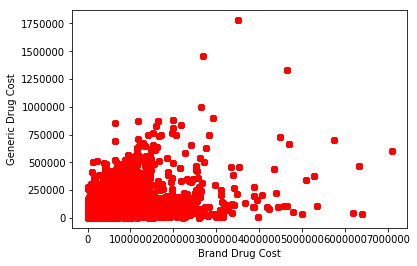

In [6]:
plt.scatter(ps_dd_df["brand_drug_cost"], ps_dd_df["generic_drug_cost"], color = "r")
plt.xlabel("Brand Drug Cost") #scatter plot of ps_dd_df data
plt.ylabel("Generic Drug Cost")
#plt.xlim(-50,200000)
#plt.ylim(-50,200000)

Text(0, 0.5, 'Log Generic Drug Cost')

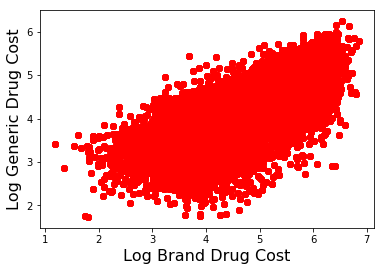

In [7]:
plt.scatter(ps_dd_df["log_brand_cost"], ps_dd_df["log_generic_cost"], color = "r")
plt.xlabel("Log Brand Drug Cost", fontsize = 16) #scatter plot of ps_dd_df data
plt.ylabel("Log Generic Drug Cost", fontsize =16)


Text(0, 0.5, 'Generic Drug Cost')

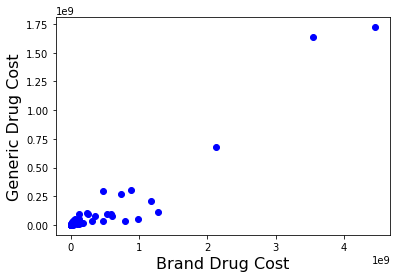

In [8]:
plt.scatter(specialty_df["brand_drug_cost"],specialty_df["generic_drug_cost"], color = "b")
plt.xlabel("Brand Drug Cost", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Generic Drug Cost",  fontsize = 16)

Text(0, 0.5, 'Log Generic Drug Cost')

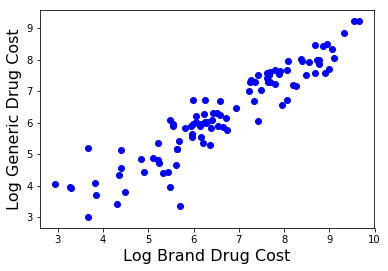

In [9]:
plt.scatter(specialty_df["log_brand_cost"],specialty_df["log_generic_cost"], color = "b")
plt.xlabel("Log Brand Drug Cost", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Log Generic Drug Cost",  fontsize = 16)

In [10]:
specialty_df.sort_values("generic_brand_ratio_cost", inplace =True, na_position = "first") #remove later

In [11]:
specialty_df["generic_brand_ratio_cost"].describe() #add cost to end of ratio

count    101.000000
mean       6.541078
std       22.375670
min        0.028867
25%        1.122567
50%        2.200907
75%        4.685040
max      221.287616
Name: generic_brand_ratio_cost, dtype: float64

Text(0, 0.5, 'Generic-Brand ratio')

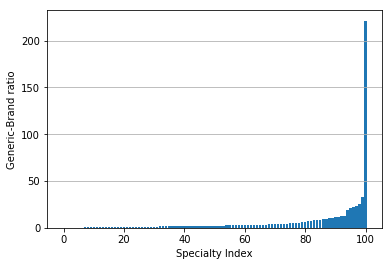

In [12]:
plt.grid(True, "both", "y") #add cost to end of ratio
plt.bar(range(len(specialty_df)),specialty_df["generic_brand_ratio_cost"]) #bar graph of specialty generic to brand ratios
plt.xlabel("Specialty Index")
plt.ylabel("Generic-Brand ratio")

In [13]:
specialty_df["specialty_description"] #Index for Specialties

0                                 Maxillofacial Surgery
1                           Speech Language Pathologist
2                                               Dentist
3      Advanced Heart Failure and Transplant Cardiology
4                                         Psychoanalyst
5              Medical Genetics, Ph.D. Medical Genetics
6                              Interventional Radiology
7                                   Orthopaedic Surgery
8                           Oral Surgery (Dentist only)
9                Physical Therapist in Private Practice
10                                       Legal Medicine
11                                 Neurological Surgery
12                          Hospice and Palliative Care
13                                         Hand Surgery
14                                           Specialist
15                                       Otolaryngology
16                                             Podiatry
17                                      General 

Text(0, 0.5, 'Generic to Brand Cost Ratio')

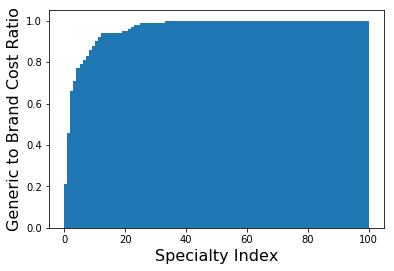

In [14]:
plt.hist(specialty_df["generic_brand_ratio_cost"], bins = range(len(specialty_df)), density =True, cumulative = True) #bar graph of specialty generic to brand ratios
plt.xlabel("Specialty Index", fontsize =16)
plt.ylabel("Generic to Brand Cost Ratio", fontsize = 16)

In [15]:
def low_mid_high(generic_brand_ratio_cost): 
    '''Sectioning off Generic Brands ratio cost as low to high'''
    #if generic_brand_ratio_cost
    if generic_brand_ratio_cost <= 10:
        return "0-10"
    elif generic_brand_ratio_cost <= 40:
        return "11-40"
    elif generic_brand_ratio_cost > 40:
        return ">40"

In [16]:
specialtyCountNormalize = specialty_df["generic_brand_ratio_cost"].map(low_mid_high).value_counts(normalize = True, sort = False) #normalized values

In [17]:
specialtyCount = specialty_df["generic_brand_ratio_cost"].map(low_mid_high).value_counts(sort = False)

In [18]:
print(specialtyCount.sort_values())

>40       1
11-40    12
0-10     88
Name: generic_brand_ratio_cost, dtype: int64


Text(0, 0.5, 'Specialty Count')

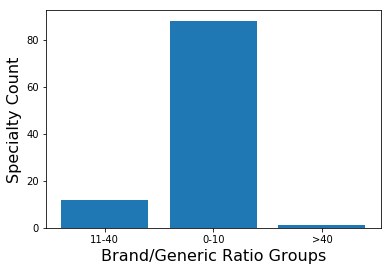

In [19]:
xIndex = specialtyCount.index.values
plt.bar(xIndex, list(specialtyCount))
plt.xlabel("Brand/Generic Ratio Groups", fontsize =16)
plt.ylabel("Specialty Count", fontsize = 16)

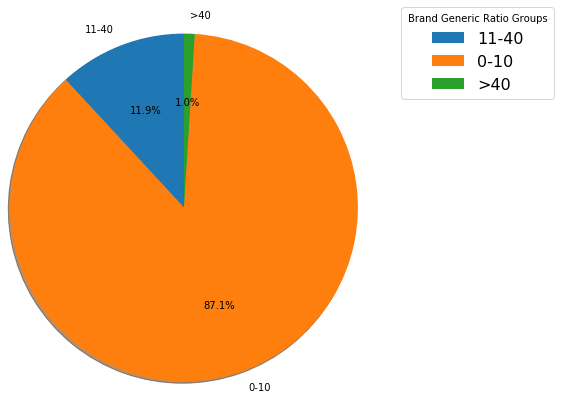

In [20]:
ax = plt.pie(x = list(specialtyCount), labels = xIndex, autopct="%1.1f%%", shadow=True, startangle = 90, radius = 2)
plt.legend(xIndex, title="Brand Generic Ratio Groups", loc = (1.5,1), fontsize =16)

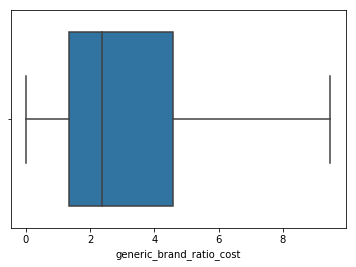

In [21]:
ax = sns.boxplot("generic_brand_ratio_cost", data=ps_dd_df, showfliers=False)


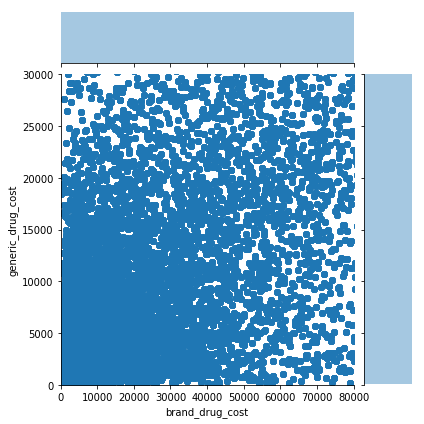

In [22]:
sns.jointplot("brand_drug_cost", "generic_drug_cost", kind = "scatter", data=ps_dd_df, xlim = (0,80000), ylim = (0,30000))

In [23]:
#sns.jointplot("log_brand_cost", "log_generic_cost", kind = "reg", data=ps_dd_df)

In [24]:
#ps_dd_df.head(10)

In [25]:
#ax = sns.jointplot("brand_drug_cost", "generic_drug_cost", data=ps_dd_df,kind = "kde", xlim = (-50000,100000), ylim = (-20000,50000) )
#ax.set_axis_labels(xlabel = "Brand Drug Cost", ylabel = "Generic Drug Cost", fontsize = 18)


In [26]:
#ax = sns.jointplot("log_brand_cost", "log_generic_cost", data=ps_dd_df,kind = "kde" )
#ax.set_axis_labels(xlabel = "Log Transformed Brand Cost", ylabel = "Log Transformed Generic Cost", fontsize = 18)


Maybe Change to brand/generic ratio

In [27]:
top_df = specialty_df.loc[specialty_df["counts"]>150].sort_values("counts", ascending=False) #run a search for specialties with over 150 providers
top_df

,specialty_description,counts,1ST TIER UNIFINE PENTIPS,1ST TIER UNIFINE PENTIPS PLUS,ABACAVIR,ABACAVIR-LAMIVUDINE,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,ABELCET,ABILIFY,ABILIFY MAINTENA,...,brand_drug_cost,generic_claim_count,generic_drug_cost,nppes_provider_zip5,total_claim_count,total_drug_cost,generic_brand_ratio_cost,log_brand_cost,log_generic_cost,Index
66,Nurse Practitioner,27111,0.0,55.0,1208.0,2428.0,60.0,0.0,396.0,5975.0,...,2.122317e+09,27543221.0,6.750216e+08,1.286931e+09,33894381,3.276793e+09,3.144073,9.326810,8.829318,66
56,Internal Medicine,23361,411.0,391.0,3523.0,6142.0,517.0,0.0,205.0,133.0,...,4.455664e+09,72277718.0,1.721958e+09,1.078919e+09,89023106,6.680843e+09,2.587556,9.648912,9.236023,56
2,Dentist,21838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.944928e+05,767590.0,5.380959e+06,1.091100e+09,1914652,1.794102e+07,0.184817,5.997602,6.730860,2
48,Family Practice,21643,96.0,231.0,1083.0,316.0,0.0,0.0,150.0,199.0,...,3.552736e+09,73511832.0,1.633780e+09,1.136493e+09,88874225,5.473660e+09,2.174549,9.550563,9.213194,48
61,Physician Assistant,16550,0.0,0.0,78.0,225.0,0.0,0.0,0.0,903.0,...,8.832331e+08,12009411.0,3.026870e+08,7.986918e+08,14975948,1.381325e+09,2.917975,8.946075,8.480994,61
32,Emergency Medicine,7659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.572154e+07,2147918.0,3.225968e+07,3.855413e+08,2714878,9.726036e+07,1.417297,7.660121,7.508660,32
52,Student in an Organized Health Care Education/...,5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.418418e+07,853301.0,1.895305e+07,1.982609e+08,1179599,9.879134e+07,2.331243,7.645267,7.277679,52
35,Psychiatry,5014,0.0,0.0,0.0,60.0,0.0,0.0,1810.0,14587.0,...,4.745576e+08,8372905.0,2.981615e+08,2.270004e+08,9322910,8.813620e+08,1.591613,8.676289,8.474452,35
29,Obstetrics & Gynecology,4946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312343e+07,932241.0,4.832345e+07,2.337218e+08,1288085,1.279818e+08,1.306269,7.800191,7.684158,29
92,Optometry,4851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.821319e+08,705170.0,1.422989e+07,2.391202e+08,1441512,2.008259e+08,12.799246,8.260386,7.153202,92


In [28]:
topFour = top_df["specialty_description"].iloc[0:4].tolist() #top 4 counts
print(topFour[0])

Nurse Practitioner


In [29]:
#for value in top_df["specialty_description"]:
    #print(ps_dd_df.loc[( ps_dd_df['specialty_description'] == value ) , 'generic_brand_ratio_cost'].tolist())
    

In [30]:
titles = []
for string in topFour:
    if len(string) > 25:
        string=string.split()
        temp = ''
        for x in string:
            temp+= x[0]
        string = temp
    titles.append(string)
print(titles)

['Nurse Practitioner', 'Internal Medicine', 'Dentist', 'Family Practice']


Text(0, 0.5, 'Log Transformed Generic Cost')

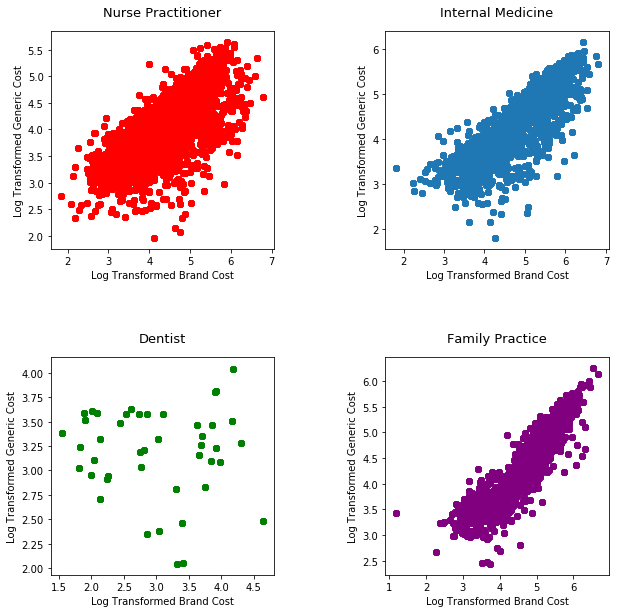

In [31]:

fig , axes = plt.subplots(2,2, figsize = (10,10))
plt.subplots_adjust(wspace = .5, hspace =.5 )


axes[0,0].scatter(ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[0] ) , 'log_brand_cost'].tolist() , ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[0] ) , 'log_generic_cost'].tolist(),c='r')
axes[0,0].set_title(titles[0], fontsize = 13, pad =15)
axes[0,0].tick_params(labelsize=10)
axes[0,0].set_xlabel("Log Transformed Brand Cost", fontsize = 10)
axes[0,0].set_ylabel("Log Transformed Generic Cost", fontsize = 10)
#axes[0,0].x_tick(rotation=30)

axes[0,1].scatter(ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[1] ) , 'log_brand_cost'].tolist() , ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[1] ) , 'log_generic_cost'].tolist())
axes[0,1].set_title(titles[1], fontsize = 13, pad =15)
axes[0,1].tick_params(labelsize=10)
axes[0,1].set_xlabel("Log Transformed Brand Cost", fontsize = 10)
axes[0,1].set_ylabel("Log Transformed Generic Cost", fontsize = 10)

axes[1,0].scatter(ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[2] ) , 'log_brand_cost'].tolist() , ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[2] ) , 'log_generic_cost'].tolist(), c ='g')
axes[1,0].set_title(titles[2], fontsize = 13, pad =15)
axes[1,0].tick_params(labelsize=10)
axes[1,0].set_xlabel("Log Transformed Brand Cost", fontsize = 10)
axes[1,0].set_ylabel("Log Transformed Generic Cost", fontsize = 10)

axes[1,1].scatter(ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[3] ) , 'log_brand_cost'].tolist() , ps_dd_df.loc[( ps_dd_df['specialty_description'] == topFour[3] ) , 'log_generic_cost'].tolist(), c = 'purple')
axes[1,1].set_title(titles[3], fontsize = 13, pad =15)
axes[1,1].tick_params(labelsize=10)
axes[1,1].set_xlabel("Log Transformed Brand Cost", fontsize = 10)
axes[1,1].set_ylabel("Log Transformed Generic Cost", fontsize = 10)